In [ ]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100
import numpy as np
import torch
from pkg_resources import packaging
import torchvision
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import OrderedDict
import torch
import pandas as pd
import json



: 

In [18]:
#print("Torch version:", torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"


clip.available_models()
model, preprocess = clip.load('RN50', device,jit=False)

In [19]:
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 102,007,137
Input resolution: 224
Context length: 77
Vocab size: 49408


In [20]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    <function load.<locals>.<lambda> at 0x7fc0e8e14040>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [21]:

# Chemin vers les fichiers CSV
csv_path = 'bert_result_f.csv'
df = pd.read_csv(csv_path)

descriptions = {df.iloc[i]['Image_Name']: df.iloc[i]['Summary'] for i in range(len(df))}


print(json.dumps(descriptions, indent=4, ensure_ascii=False))


{
    "miso-butter-roast-chicken-acorn-squash-panzanella": "Roast chicken in a large cast-iron skillet until an instant-read thermometer inserted into the thickest part of breast registers 155°F, 50–60 minutes. Meanwhile, roast squash on lower rack until mostly tender, about 25 minutes.",
    "crispy-salt-and-pepper-potatoes-dan-kluger": "Roast the potatoes until they are crispy and tender when poked with a knife.",
    "thanksgiving-mac-and-cheese-erick-williams": "Bring evaporated milk and whole milk to a bare simmer in a large saucepan over medium heat. Whisk in garlic powder, onion powder, paprika, pepper, and 1 tsp. salt. Working in batches, whisk in three fourths of the cheddar, then all of the cream cheese.",
    "italian-sausage-and-bread-stuffing-240559": "Bread can be toasted 3 days ahead and kept (once cool) in a sealed bag at room temperature. Stuffing can be prepared (but not baked) 4 hours before roasting turkey.",
    "newtons-law-apple-bourbon-cocktail": "Stir together 

In [23]:
import os
import matplotlib.pyplot as plt
from PIL import Image

original_images = []
images = []
texts = []

# Chemin vers le dossier contenant les images
dossier_images = 'data_recipe/Food Images/Food Images'

# Récupérer la liste de tous les fichiers dans le dossier
fichiers = os.listdir(dossier_images)
liste_test = [filename for filename in fichiers if filename.endswith(".png") or filename.endswith(".jpg")]

available_images = []


for filename in fichiers : 
    print(filename)
    
    name = os.path.splitext(filename)[0]
    if name in descriptions:
        available_images.append(name)
       

"""
    #image = Image.open(os.path.join(dossier_images, filename)).convert("RGB")
  
    original_images.append(image)
    images.append(preprocess(image))
    texts.append(descriptions[name])
    
# Afficher les 10 premières images avec leurs titres
for titre in images[:3]:
    chemin_image = os.path.join(dossier_images, titre)
    img = Image.open(chemin_image)
    
    plt.figure()
    plt.imshow(img)
    plt.title(titre)
    plt.axis('off')  # Cacher les axes pour une meilleure visibilité de l'image
    plt.show()
plt.tight_layout()
"""


asian-chicken-and-cabbage-salad-51160620.jpg
asiago-cheese-with-glazed-cipolline-onions-355871.jpg
asiago-pepper-frico-235138.jpg
asian-avocado-salsa-243002.jpg
ash-roasted-sweet-potatoes-56389756.jpg
almond-butter-and-finger-bananas-on-fruit-bread-239169.jpg
asian-chicken-and-cilantro-meatballs.jpg
avocado-salad-with-bell-pepper-and-tomatoes-51190610.jpg
chocolate-chip-coffee-cake-233141.jpg
almond-sherry-christmas-trifle-350953.jpg
banana-pancakes-with-pineapple-and-creme-fraiche-51175120.jpg
black-eyed-pea-and-pumpkin-salad-234794.jpg
amazonia-350150.jpg
3-ingredient-grilled-and-fresh-tomato-salsa.jpg
almond-granita-365749.jpg
coconut-peach-layer-cake-106982.jpg
-pork-chops-with-carrots-and-toasted-buckwheat-51260680.jpg
broccolini-with-italian-herb-oil-351169.jpg
blackberry-syrup-51205320.jpg
a-better-granola-51143850.jpg
chocolate-coconut-truffles-354389.jpg
cherry-cornmeal-upside-down-cake-242516.jpg
bacon-wrapped-maple-pork-loin-233983.jpg
cauliflower-with-quinoa-prunes-and-pean

'\n    #image = Image.open(os.path.join(dossier_images, filename)).convert("RGB")\n  \n    original_images.append(image)\n    images.append(preprocess(image))\n    texts.append(descriptions[name])\n    \n# Afficher les 10 premières images avec leurs titres\nfor titre in images[:3]:\n    chemin_image = os.path.join(dossier_images, titre)\n    img = Image.open(chemin_image)\n    \n    plt.figure()\n    plt.imshow(img)\n    plt.title(titre)\n    plt.axis(\'off\')  # Cacher les axes pour une meilleure visibilité de l\'image\n    plt.show()\nplt.tight_layout()\n'

In [24]:
count

3468

In [10]:
image_input = torch.tensor(np.stack(images)).cuda()
print(image_input.shape)
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).cuda()

with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

ValueError: need at least one array to stack

Text(0.5, 1.0, 'Cosine similarity between text and image features')

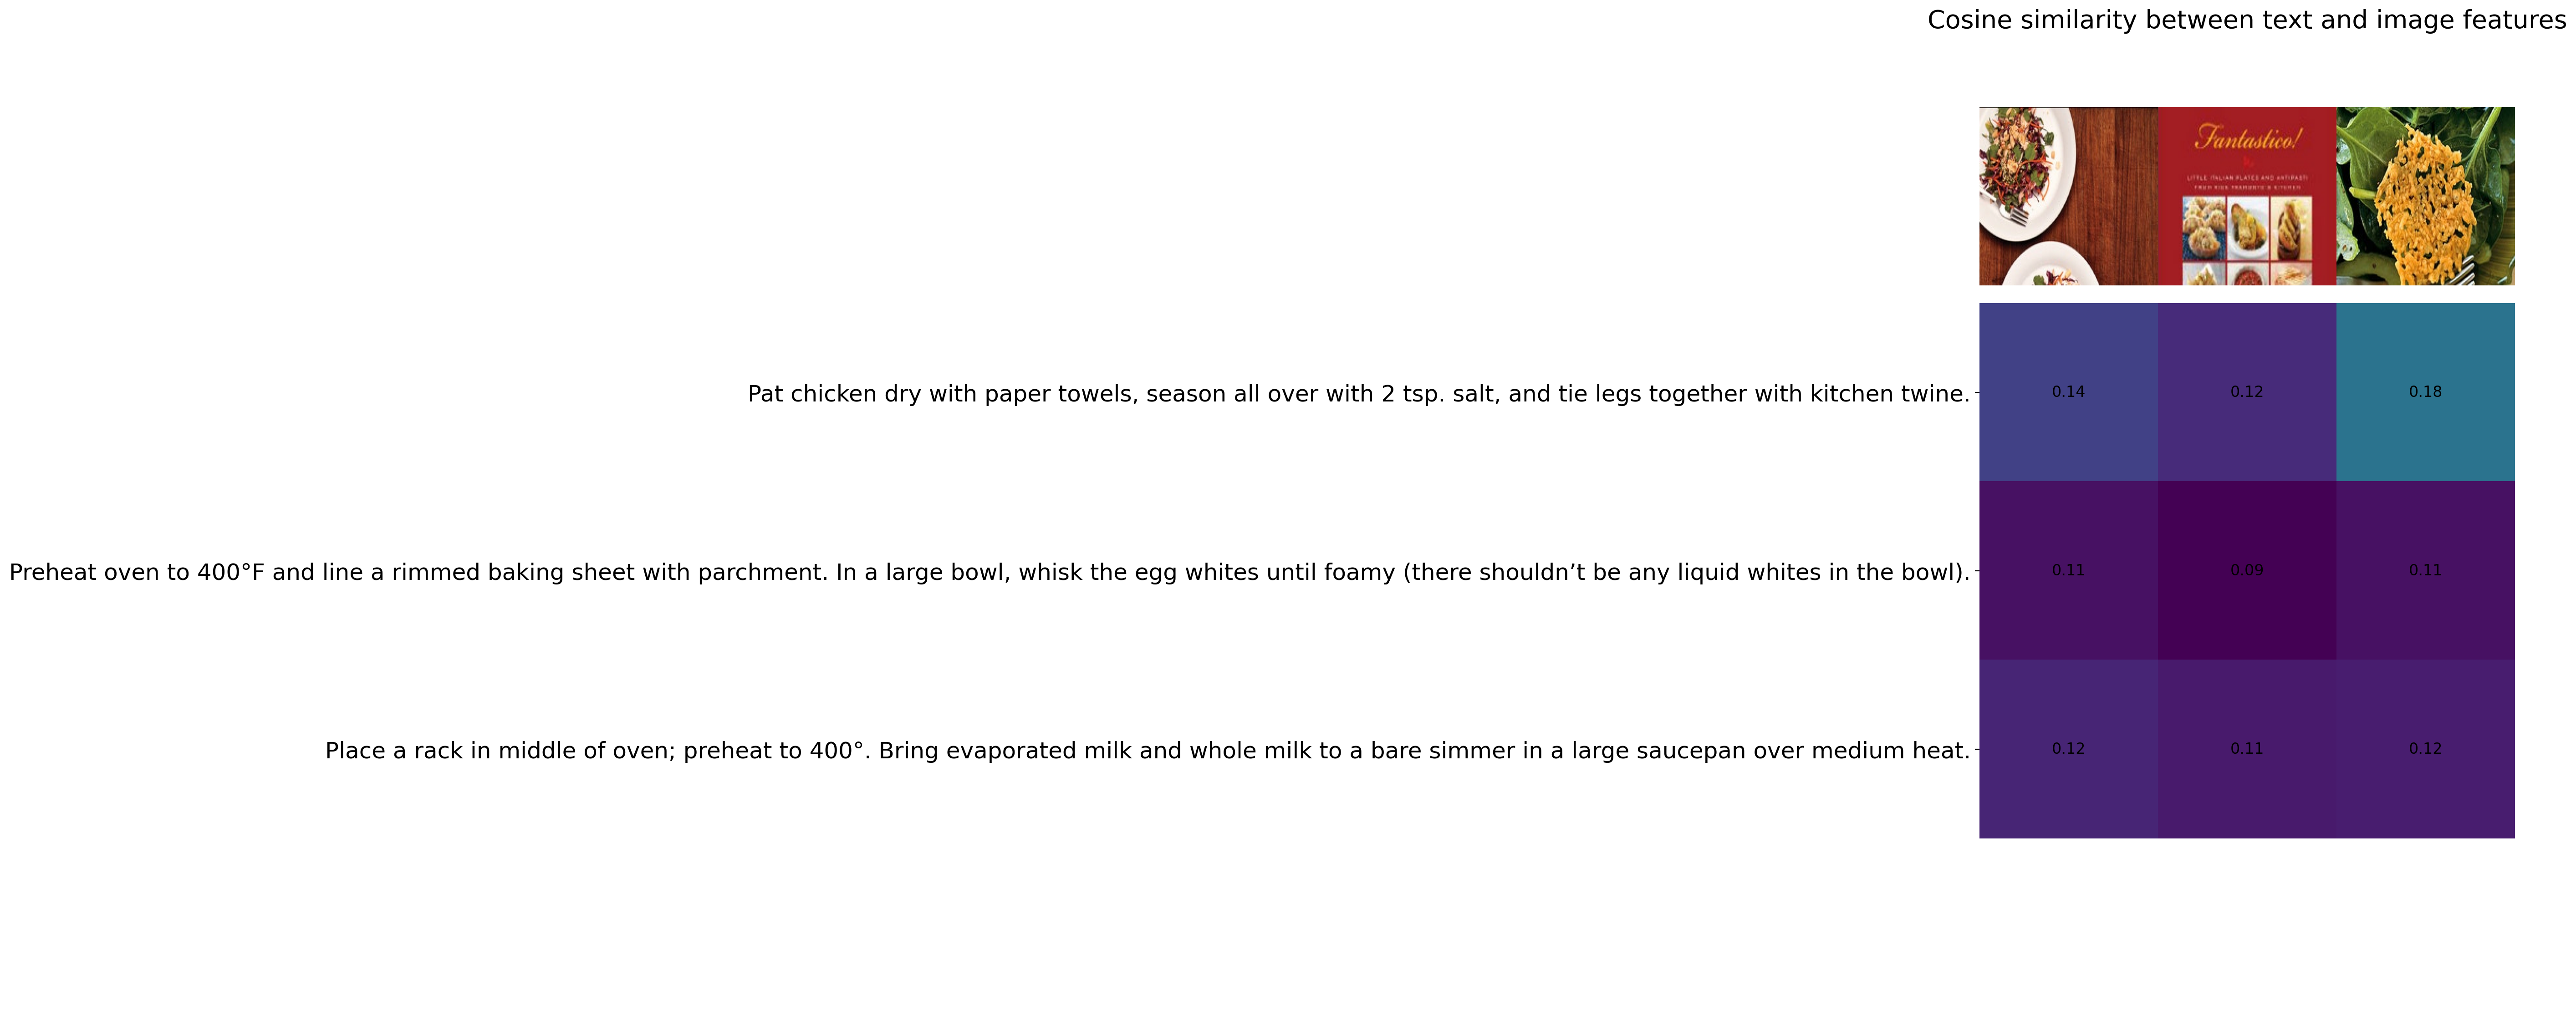

In [29]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
     
count = len(descriptions)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)